In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
from scipy import stats
#from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sk
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_classification
#from sklearn.metrics import accuracy_score


In [2]:
from pandas import read_csv

In [3]:
df = read_csv('xAPI-Edu-Data.csv')
df.head()
dt=df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
gender                      480 non-null object
NationalITy                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
raisedhands                 480 non-null int64
VisITedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object
dtypes: int64(4), object(13)
memory usage: 63.8+ KB


In [5]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [6]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [7]:
df2 = df


In [8]:
cols = ['gender','NationalITy','PlaceofBirth','StageID','GradeID','SectionID','Topic','Semester','Relation','ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays']
df2 = pd.get_dummies(df2,columns = cols) 

In [9]:
df2.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,...,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,15,16,2,20,M,0,1,0,0,0,...,1,0,1,0,0,1,0,1,0,1
1,20,20,3,25,M,0,1,0,0,0,...,1,0,1,0,0,1,0,1,0,1
2,10,7,0,30,L,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3,30,25,5,35,L,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,40,50,12,50,M,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [10]:
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

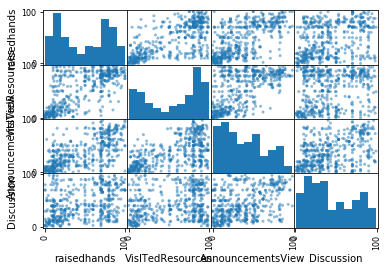

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

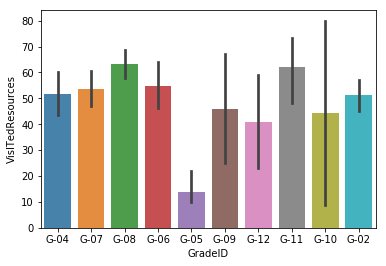

In [12]:
sns.barplot(df['GradeID'],df['VisITedResources'], alpha=0.9)

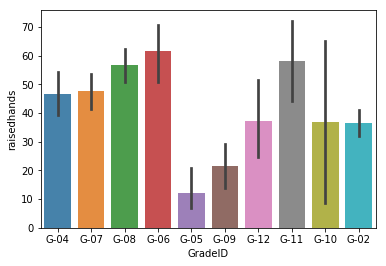

In [13]:
sns.barplot(df['GradeID'],df['raisedhands'], alpha=0.9)

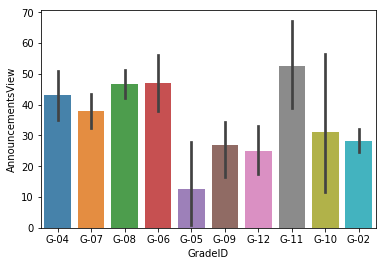

In [14]:
sns.barplot(df['GradeID'],df['AnnouncementsView'], alpha=0.9)

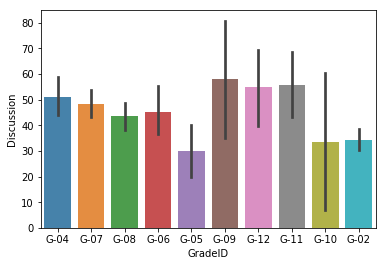

In [15]:
sns.barplot(df['GradeID'],df['Discussion'], alpha=0.9)

In [16]:
seed = 1
df["gender"] = df["gender"].astype('category')
df["NationalITy"] = df["NationalITy"].astype('category')
df["PlaceofBirth"] = df["PlaceofBirth"].astype('category')
df["StageID"] = df["StageID"].astype('category')
df["GradeID"] = df["GradeID"].astype('category')
df["SectionID"] = df["SectionID"].astype('category')
df["Topic"] = df["Topic"].astype('category')
df["Semester"] = df["Semester"].astype('category')
df["Relation"] = df["Relation"].astype('category')
df["ParentAnsweringSurvey"] = df["ParentAnsweringSurvey"].astype('category')
df["ParentschoolSatisfaction"] = df["ParentschoolSatisfaction"].astype('category')
df["StudentAbsenceDays"] = df["StudentAbsenceDays"].astype('category')
df["Class"] = df["Class"].astype('category')


In [17]:
df["gender"] = df["gender"].cat.codes
df["NationalITy"] = df["NationalITy"].cat.codes
df["PlaceofBirth"] = df["PlaceofBirth"].cat.codes
df["StageID"] = df["StageID"].cat.codes
df["GradeID"] = df["GradeID"].cat.codes
df["SectionID"] = df["SectionID"].cat.codes
df["Topic"] = df["Topic"].cat.codes
df["Semester"] = df["Semester"].cat.codes
df["Relation"] = df["Relation"].cat.codes
df["ParentAnsweringSurvey"] = df["ParentAnsweringSurvey"].cat.codes
df["ParentschoolSatisfaction"] = df["ParentschoolSatisfaction"].cat.codes
df["StudentAbsenceDays"] = df["StudentAbsenceDays"].cat.codes
df["Class"] = df["Class"].cat.codes


In [18]:
df2 = df

In [19]:
Y = df['Class']

In [20]:
X = df.drop('Class',1)

In [21]:
from sklearn import preprocessing

In [22]:
normalized_df2 = preprocessing.normalize(X)

In [23]:
from sklearn.model_selection import train_test_split


In [24]:
X_train, X_test, y_train, y_test = train_test_split(normalized_df2, Y, test_size=0.2, random_state=0)

In [25]:
import sklearn.metrics as sk
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

In [26]:
clf = RandomForestClassifier(n_jobs=1000, random_state=10,n_estimators=10)

In [27]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1000,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [28]:
p= clf.predict(X_test)

In [29]:
sk.confusion_matrix(y_test,p)

array([[19,  0,  9],
       [ 0, 22,  1],
       [ 8,  4, 33]], dtype=int64)

In [30]:
accuracy_score(y_test,p)*100

77.08333333333334

In [31]:
from sklearn.neural_network import MLPClassifier

In [32]:
clf2 = MLPClassifier(solver='lbfgs', alpha=1e-7,hidden_layer_sizes=(30,), random_state=0,learning_rate='adaptive')

In [33]:
clf2.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1e-07, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [34]:
p2= clf2.predict(X_test)

In [35]:
sk.confusion_matrix(y_test,p2)

array([[17,  0, 11],
       [ 0, 23,  0],
       [11,  4, 30]], dtype=int64)

In [36]:
accuracy_score(y_test,p2)*100

72.91666666666666

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
clf3 = LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [39]:
clf3.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [40]:
p3= clf3.predict(X_test)

In [41]:
sk.confusion_matrix(y_test,p3)

array([[ 5,  1, 22],
       [ 0, 16,  7],
       [ 2,  2, 41]], dtype=int64)

In [42]:
accuracy_score(y_test,p3)*100

64.58333333333334

In [43]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=10)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [44]:
y_pred = classifier.predict(X_test)  

In [45]:
sk.confusion_matrix(y_test,y_pred)

array([[16,  1, 11],
       [ 1, 16,  6],
       [19,  3, 23]], dtype=int64)

In [46]:
accuracy_score(y_test,y_pred)*100

57.291666666666664

In [47]:
df.shape

(480, 17)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
gender                      480 non-null int8
NationalITy                 480 non-null int8
PlaceofBirth                480 non-null int8
StageID                     480 non-null int8
GradeID                     480 non-null int8
SectionID                   480 non-null int8
Topic                       480 non-null int8
Semester                    480 non-null int8
Relation                    480 non-null int8
raisedhands                 480 non-null int64
VisITedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null int8
ParentschoolSatisfaction    480 non-null int8
StudentAbsenceDays          480 non-null int8
Class                       480 non-null int8
dtypes: int64(4), int8(13)
memory usage: 21.2 KB


In [49]:
df.describe()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.635417,4.345833,4.397917,1.345833,2.906250,0.472917,5.256250,0.489583,0.410417,46.775000,54.797917,37.918750,43.283333,0.562500,0.608333,0.602083,1.143750
std,0.481815,2.469265,2.628334,0.603732,2.464267,0.612411,3.388388,0.500413,0.492423,30.779223,33.080007,26.611244,27.637735,0.496596,0.488632,0.489979,0.846312
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,3.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,15.750000,20.000000,14.000000,20.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,4.000000,4.000000,1.000000,4.000000,0.000000,5.000000,0.000000,0.000000,50.000000,65.000000,33.000000,39.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,4.000000,2.000000,5.000000,1.000000,7.000000,1.000000,1.000000,75.000000,84.000000,58.000000,70.000000,1.000000,1.000000,1.000000,2.000000
max,1.000000,13.000000,13.000000,2.000000,9.000000,2.000000,11.000000,1.000000,1.000000,100.000000,99.000000,98.000000,99.000000,1.000000,1.000000,1.000000,2.000000


In [50]:
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
scores = cross_val_score(clf,X,Y, cv=10)

In [53]:
scores

array([0.66      , 0.73469388, 0.52083333, 0.66666667, 0.58333333,
       0.52083333, 0.6875    , 0.68085106, 0.76595745, 0.80851064])

In [54]:
scores2 = cross_val_score(clf2,X,Y, cv=10)

In [55]:
scores3 = cross_val_score(clf3,X,Y, cv=10)

In [56]:
scores4 = cross_val_score(classifier,X,Y, cv=10)

In [57]:
scores2

array([0.74      , 0.69387755, 0.58333333, 0.5625    , 0.54166667,
       0.66666667, 0.625     , 0.68085106, 0.68085106, 0.70212766])

In [58]:
scores3

array([0.64      , 0.67346939, 0.64583333, 0.64583333, 0.5625    ,
       0.72916667, 0.70833333, 0.85106383, 0.72340426, 0.72340426])

In [59]:
scores4

array([0.52      , 0.65306122, 0.5625    , 0.70833333, 0.54166667,
       0.47916667, 0.52083333, 0.72340426, 0.4893617 , 0.63829787])

In [60]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

LR: 0.533333 (0.075231)
LDA: 0.635417 (0.077532)
KNN: 0.508333 (0.093263)
CART: 0.627083 (0.085620)
NB: 0.552083 (0.099150)
SVM: 0.552083 (0.084497)
RandomForest: 0.716667 (0.053684)
MLP: 0.712500 (0.084779)


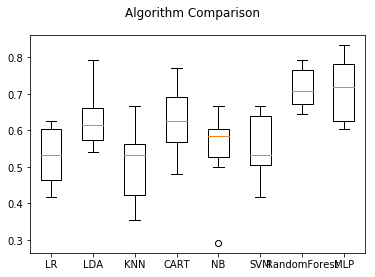

In [61]:
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression(multi_class='multinomial', solver='newton-cg')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel = 'linear')))
models.append(('RandomForest',RandomForestClassifier(n_jobs=1000, random_state=10,n_estimators=10) ))
models.append(('MLP',MLPClassifier(solver='lbfgs', alpha=1e-7,hidden_layer_sizes=(30,), random_state=0,learning_rate='adaptive')))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, normalized_df2, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [62]:

import csv
import random
import math
import operator

seed = 2
def loadDataset(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        dataset = dataset[1:]
        for x in range(len(dataset)):
            for y in range(13):         # 0 to 7 , the numeric values only
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])
 
 
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)
 
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))     # Sort distances in ascending order
    neighbors = []
    for x in range(k):                             # k nearest neighbors
        neighbors.append(distances[x][0])
    return neighbors
 
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]
 
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

trainingSet=[]
testSet=[]
split = 0.67
loadDataset('test.csv', split, trainingSet, testSet)
print('Train set: ' + repr(len(trainingSet)))
print('Test set: ' + repr(len(testSet)))
# generate predictions
predictions=[]
k = 3
for x in range(len(testSet)):
    neighbors = getNeighbors(trainingSet, testSet[x], k)
    result = getResponse(neighbors)
    predictions.append(result)
accuracy = getAccuracy(testSet, predictions)
print('Accuracy: ' + repr(accuracy) + '%')

Train set: 843
Test set: 419
Accuracy: 55.847255369928405%


In [63]:
MLA = [
    #Ensemble Methods
    RandomForestClassifier(n_jobs=1000, random_state=10,n_estimators=10),    
    #GLM
    LogisticRegression(multi_class='multinomial', solver='newton-cg'),
    MLPClassifier(solver='lbfgs', alpha=1e-7,hidden_layer_sizes=(30,), random_state=0,learning_rate='adaptive'),
    GaussianNB(),
    KNeighborsClassifier(),
    SVC(kernel = 'linear'),
    LinearDiscriminantAnalysis(),
    DecisionTreeClassifier()
   #tree.ExtraTreeClassifier(),
    
    ]

In [64]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

In [65]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

seed = 5
row_index = 0
for alg in MLA:
    predicted = alg.fit(X_train, y_train).predict(X_test)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    MLA_compare.loc[row_index, 'f1-Score'] = f1_score(y_test, predicted,average='micro')
    MLA_compare.loc[row_index, 'recall'] = recall_score(y_test, predicted,average='micro')
    MLA_compare.loc[row_index, 'precision_score'] = precision_score(y_test, predicted,average='micro')
    row_index = row_index+1

In [66]:
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,f1-Score,recall,precision_score
0,RandomForestClassifier,0.9870,0.7708,0.770833,0.770833,0.770833
7,DecisionTreeClassifier,1.0000,0.7396,0.739583,0.739583,0.739583
2,MLPClassifier,0.7891,0.7292,0.729167,0.729167,0.729167
1,LogisticRegression,0.5521,0.6458,0.645833,0.645833,0.645833
6,LinearDiscriminantAnalysis,0.6979,0.6250,0.625000,0.625000,0.625000
4,KNeighborsClassifier,0.6979,0.6146,0.614583,0.614583,0.614583
5,SVC,0.5469,0.6146,0.614583,0.614583,0.614583
3,GaussianNB,0.5547,0.5833,0.583333,0.583333,0.583333


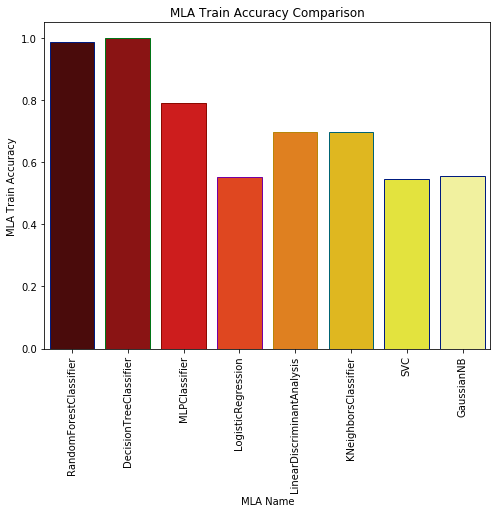

In [67]:

plt.subplots(figsize=(8,6))
sns.barplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()


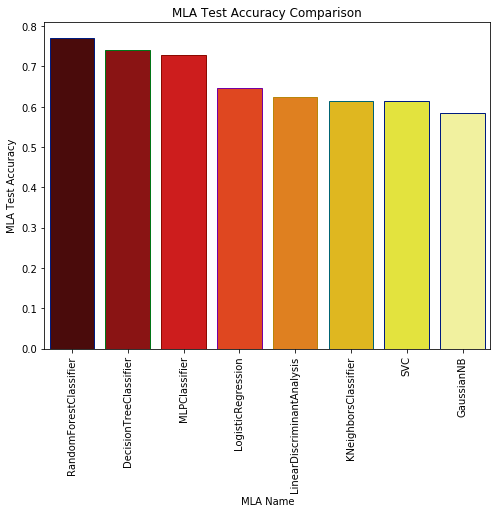

In [68]:
plt.subplots(figsize=(8,6))
sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()

In [69]:
lda = LinearDiscriminantAnalysis()

In [70]:
lda.fit(X_train, y_train)  

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [71]:
y_pred = lda.predict(X_test)  

In [72]:
scores5 = cross_val_score(lda,normalized_df2,Y, cv=10)

In [73]:
scores5

array([0.66      , 0.6122449 , 0.5625    , 0.58333333, 0.52083333,
       0.45833333, 0.5       , 0.78723404, 0.5106383 , 0.68085106])

In [74]:
Dt = DecisionTreeClassifier()

In [75]:
Dt.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [76]:
y_pred = Dt.predict(X_test)  

In [77]:
sk.confusion_matrix(y_test,y_pred)

array([[20,  0,  8],
       [ 0, 18,  5],
       [ 6,  3, 36]], dtype=int64)

In [78]:
accuracy_score(y_test,y_pred)*100

77.08333333333334

In [79]:
from sklearn.decomposition import PCA


In [80]:
import seaborn as sns

In [87]:
i = 1
MLA_columns = []
row_index = 0
MLA_compare = pd.DataFrame(columns = MLA_columns)
seed = 8
while i < 9:
    pca1 = PCA(i)
    i = i+1
    principalComponents = pca1.fit_transform(df)
    X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.2, random_state=0)
    for alg in MLA:
        predicted = alg.fit(X_train, y_train).predict(X_test)
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index,'MLA Name'] = MLA_name
        MLA_compare.loc[row_index,'MLA Components'] = pca1.n_components_
        MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, y_train), 4)
        MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test, y_test), 4)
        MLA_compare.loc[row_index, 'f1-Score'] = f1_score(y_test, predicted,average='micro')
        MLA_compare.loc[row_index, 'recall'] = recall_score(y_test, predicted,average='micro')
        MLA_compare.loc[row_index, 'precision_score'] = precision_score(y_test, predicted,average='micro')
        row_index = row_index+1

In [88]:
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

,MLA Name,MLA Components,MLA Train Accuracy,MLA Test Accuracy,f1-Score,recall,precision_score
56,RandomForestClassifier,8.0,0.9818,0.7396,0.739583,0.739583,0.739583
61,SVC,8.0,0.6849,0.7083,0.708333,0.708333,0.708333
57,LogisticRegression,8.0,0.6823,0.7083,0.708333,0.708333,0.708333
53,SVC,7.0,0.6667,0.6979,0.697917,0.697917,0.697917
50,MLPClassifier,7.0,0.8750,0.6875,0.687500,0.687500,0.687500
49,LogisticRegression,7.0,0.6693,0.6875,0.687500,0.687500,0.687500
39,DecisionTreeClassifier,5.0,1.0000,0.6875,0.687500,0.687500,0.687500
20,KNeighborsClassifier,3.0,0.7318,0.6875,0.687500,0.687500,0.687500
18,MLPClassifier,3.0,0.7682,0.6875,0.687500,0.687500,0.687500
63,DecisionTreeClassifier,8.0,1.0000,0.6771,0.677083,0.677083,0.677083
